In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as pdr
import datetime

In [2]:
name = input('Stock abb ')

Stock abb MS


In [3]:
all_stocks = []

In [4]:
all_stocks.append(name)

In [5]:
stock = yf.Ticker(name)
bs = stock.quarterly_balance_sheet
cf = stock.quarterly_cashflow
i_s = stock.quarterly_financials

In [6]:
stock.info

{'zip': '10036',
 'sector': 'Financial Services',
 'fullTimeEmployees': 73620,
 'longBusinessSummary': 'Morgan Stanley, a financial holding company, provides various financial products and services to corporations, governments, financial institutions, and individuals in the Americas, Europe, the Middle East, Africa, and Asia. The company operates through Institutional Securities, Wealth Management, and Investment Management segments. The Institutional Securities segment offers capital raising and financial advisory services, including services related to the underwriting of debt, equity, and other securities, as well as advice on mergers and acquisitions, restructurings, real estate, and project finance. This segment also provides sales and trading services, such as sales, financing, prime brokerage, and market-making services in equity and fixed income products consisting of foreign exchange and commodities; corporate and commercial real estate loans, which provides secured lending fa

In [7]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
yesterday.strftime('%Y-%m-%d')

try:
    try:
        df = pdr.get_data_yahoo(name, end = yesterday)
    except OverflowError           :
        print('Invalid Time!!! Return Default')
        df = pdr.get_data_yahoo(name, end=yesterday)
except KeyError:
    print('Not valid Stock')

In [8]:
def md(name, first_money, df):
    
    df['ma5'] = df.loc[:, 'Close'].rolling(5).mean()
    df['ma30'] = df.loc[:, 'Close'].rolling(30).mean()
    # data = data[:100]
    df = df[:]
    df[['Close', 'ma5', 'ma30']].plot()
    
    
    plt.show()
    
    
    sr1 = df['ma5'] < df['ma30']
    sr2 = df['ma5'] >= df['ma30']

    death_cross = df[sr1 & sr2.shift(1)].index  
    golden_cross = df[-(sr1 | sr2.shift(1))].index  


    
    money = first_money
    hold = 0   
    sr1 = pd.Series(1, index=golden_cross)
    sr2 = pd.Series(0, index=death_cross)
    sr = sr1.append(sr2)

    sr = sr.sort_index()

    for i in range(0, len(sr)):
        price = df['Open'][sr.index[i]]
        if sr.iloc[i] == 1:
            buy = money // (100 * price)

            hold += buy*100
            money -= buy*100*price
        else:
            money += hold * price
            hold = 0
    
    price = df['Open'][-1]
    now_money = hold * price + money
    print('earning: ', now_money - first_money)

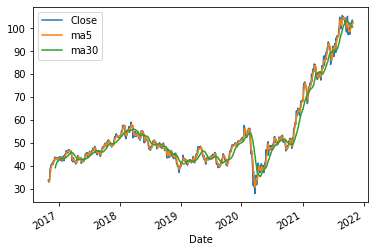

earning:  113224.02572631836


In [9]:
first_money = 100000
md(name, first_money, df)

# common size B|S I|S and C|F

In [10]:
def common_size(bs, cf, i_s):
    csbs = bs.copy()
    csis = i_s.copy()
    cscf = cf.copy()

    for i, count in enumerate(csbs.loc['Total Assets', :]):
        csbs.iloc[:, i] = csbs.iloc[:, i]/ count
    for i, count in enumerate(csis.loc['Total Revenue', :]):
        csis.iloc[:, i] = csis.copy().iloc[:, i]/ count
        cscf.iloc[:, i] = cscf.iloc[:, i]/ count
    
    return csbs, csis, cscf

In [11]:
common_size_bs, common_size_is, common_size_cf  = common_size(bs, cf, i_s)

In [12]:
common_size_cf

,2021-09-30,2021-06-30,2021-03-31,2020-12-31
Net Income,0.251271,0.237889,0.262103,0.248167
Change To Liabilities,0.000000,0.450369,0.208029,1.173387
Investments,NaN,1.000745,-0.818754,0.086290
Total Cashflows From Investing Activities,NaN,0.211193,-1.435269,-0.033724
Net Borrowings,NaN,0.484653,0.034353,0.644355
Total Cash From Financing Activities,NaN,0.032861,0.608436,2.555645
Change To Operating Activities,NaN,-0.108002,1.048858,-2.237610
Change In Cash,NaN,0.566570,0.792926,0.797801
Repurchase Of Stock,NaN,-0.204485,-0.164260,-0.003666
Effect Of Exchange Rate,NaN,0.009825,-0.090209,0.137317


In [13]:
bs

,2021-09-30,2021-06-30,2021-03-31,2020-12-31
Total Stockholder Equity,9.912000e+10,9.912000e+10,9.850900e+10,9.253100e+10
Net Tangible Assets,7.359200e+10,7.359200e+10,7.282700e+10,7.591600e+10
Intangible Assets,NaN,8.690000e+09,8.846000e+09,4.980000e+09
Capital Surplus,NaN,2.803000e+10,2.740600e+10,2.554600e+10
Total Liab,NaN,1.053643e+12,1.051184e+12,1.012713e+12
Minority Interest,NaN,1.292000e+09,1.329000e+09,1.368000e+09
Other Current Liab,NaN,1.377870e+11,1.565780e+11,1.311700e+11
Total Assets,NaN,1.161805e+12,1.158772e+12,1.115862e+12
Common Stock,NaN,2.000000e+07,2.000000e+07,2.000000e+07
Other Current Assets,NaN,1.200010e+11,1.268300e+11,1.453910e+11


In [14]:
i_s

,2021-09-30,2021-06-30,2021-03-31,2020-12-31
Research Development,None,None,None,None
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,4874000000.0,4566000000.0,5344000000.0,4430000000.0
Minority Interest,NaN,1292000000.0,1329000000.0,1368000000.0
Net Income,3707000000.0,3511000000.0,4120000000.0,3385000000.0
Selling General Administrative,7208000000.0,7704000000.0,7940000000.0,6595000000.0
Gross Profit,13140000000.0,13199000000.0,14076000000.0,12167000000.0
Ebit,0.0,0.0,0.0,0.0
Operating Income,5908000000.0,5422000000.0,6234000000.0,5572000000.0
Other Operating Expenses,None,None,None,None


In [15]:
cf

,2021-09-30,2021-06-30,2021-03-31,2020-12-31
Net Income,3.707000e+09,3.511000e+09,4.120000e+09,3.385000e+09
Change To Liabilities,0.000000e+00,6.647000e+09,3.270000e+09,1.600500e+10
Investments,NaN,1.477000e+10,-1.287000e+10,1.177000e+09
Total Cashflows From Investing Activities,NaN,3.117000e+09,-2.256100e+10,-4.600000e+08
Net Borrowings,NaN,7.153000e+09,5.400000e+08,8.789000e+09
Total Cash From Financing Activities,NaN,4.850000e+08,9.564000e+09,3.485900e+10
Change To Operating Activities,NaN,-1.594000e+09,1.648700e+10,-3.052100e+10
Change In Cash,NaN,8.362000e+09,1.246400e+10,1.088200e+10
Repurchase Of Stock,NaN,-3.018000e+09,-2.582000e+09,-5.000000e+07
Effect Of Exchange Rate,NaN,1.450000e+08,-1.418000e+09,1.873000e+09


# ratios

 Liquidity Ratio
        

In [16]:
current_ratio = bs.loc['Total Current Assets', :] / bs.loc['Total Current Liabilities', :]

In [17]:
current_ratio


2021-09-30         NaN
2021-06-30    1.877736
2021-03-31    1.778085
2020-12-31    1.779856
dtype: float64

In [54]:
tickers = yf.Tickers('msft aapl goog')

In [55]:
tickers

yfinance.Tickers object <MSFT,AAPL,GOOG>

In [65]:
all_dfs = yf.download("MS MSFT AMZN TSLA GS", end = yesterday).loc[:, 'Close']

[*********************100%***********************]  5 of 5 completed


<AxesSubplot:xlabel='Date'>

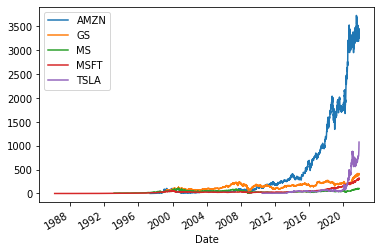

In [67]:
all_dfs.plot()

In [71]:
all_dfs

,AMZN,GS,MS,MSFT,TSLA
Date,,,,,
1986-03-13,NaN,NaN,NaN,0.097222,NaN
1986-03-14,NaN,NaN,NaN,0.100694,NaN
1986-03-17,NaN,NaN,NaN,0.102431,NaN
1986-03-18,NaN,NaN,NaN,0.099826,NaN
1986-03-19,NaN,NaN,NaN,0.098090,NaN
...,...,...,...,...,...
2021-10-22,3335.550049,414.320007,101.800003,309.160004,909.679993
2021-10-25,3320.370117,414.750000,101.910004,308.130005,1024.859985
2021-10-26,3376.070068,417.609985,103.470001,310.109985,1018.429993


In [79]:
log_returns = np.log(all_dfs.pct_change()+1)

In [80]:
log_returns.mean()*252

AMZN    0.305964
GS      0.078984
MS      0.090076
MSFT    0.227633
TSLA    0.478389
dtype: float64

In [75]:
import scipy.stats as scs
import numpy as np

In [82]:
weights = np.random.random(5)
weights /= np.sum(weights)
weights

array([0.23142589, 0.03008559, 0.22605763, 0.26306151, 0.24936937])

In [83]:
np.dot(weights, log_returns.mean())*252

0.27272359976066346

In [84]:
np.dot(weights, np.dot(log_returns.cov()*252, weights))

0.10426949164232457

In [85]:
np.sqrt(np.dot(weights, np.dot(log_returns.cov()*252, weights)))

0.32290786865966054

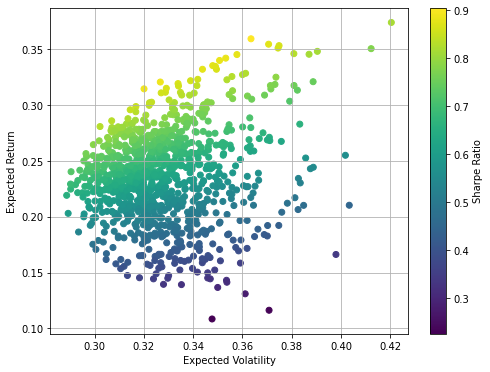

In [111]:
port_returns = []
port_variance = []
for p in range(1000):
    weights = np.random.random(5)
    weights /=np.sum(weights)
    port_returns.append(np.sum(log_returns.mean()*252*weights))
    port_variance.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*252, weights))))

port_returns = np.array(port_returns)
port_variance = np.array(port_variance)

#无风险利率设定为3%
risk_free = 0.03
plt.figure(figsize=(8, 6))
plt.scatter(port_variance, port_returns, c=(port_returns-risk_free)/port_variance, marker = 'o')
plt.grid(True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label = 'Sharpe Ratio')

In [112]:
## Portfolio Optimization 1—Maximum Sharpe Rate

import scipy.optimize as sco

def stats(weights):
    weights = np.array(weights)
    port_returns = np.sum(log_returns.mean()*weights)*252
    port_variance = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*252,weights)))
    return np.array([port_returns, port_variance, port_returns/port_variance])


def min_sharpe(weights):
    return -stats(weights)[2]


x0 = 5*[1./5]

bnds = tuple((0,1) for x in range(5))


cons = ({'type':'eq', 'fun':lambda x: np.sum(x)-1})

opts = sco.minimize(min_sharpe,
                    x0, 
                    method = 'SLSQP', 
                    bounds = bnds, 
                    constraints = cons)
opts

     fun: -1.0106613942112037
     jac: array([-1.29565597e-04,  2.02536970e-01,  2.72037312e-01,  7.97659159e-05,
       -2.58684158e-05])
 message: 'Optimization terminated successfully'
    nfev: 43
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([1.59355199e-01, 1.40732214e-16, 0.00000000e+00, 4.01466640e-01,
       4.39178160e-01])

In [113]:
#Portfolio optimization 2-minimum variance

def min_variance(weights):
    return stats(weights)[1]

optv = sco.minimize(min_variance, 
                    x0, 
                    method = 'SLSQP', 
                    bounds = bnds, 
                    constraints = cons)
optv

     fun: 0.2867216314212645
     jac: array([0.28700355, 0.28676924, 0.32158475, 0.28667166, 0.28663933])
 message: 'Optimization terminated successfully'
    nfev: 48
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.0627878 , 0.34368162, 0.        , 0.45734607, 0.13618452])

In [114]:
optv['x'].round(3)

array([0.063, 0.344, 0.   , 0.457, 0.136])

In [122]:
def min_variance(weights):
    return stats(weights)[1]

target_returns = np.linspace(0.0,0.5,50)
target_variance = []
for tar in target_returns:
    cons = ({'type':'eq','fun':lambda x:stats(x)[0]-tar},{'type':'eq','fun':lambda x:np.sum(x)-1})
    res = sco.minimize(min_variance, x0, method = 'SLSQP', bounds = bnds, constraints = cons)
    target_variance.append(res['fun'])

target_variance = np.array(target_variance)

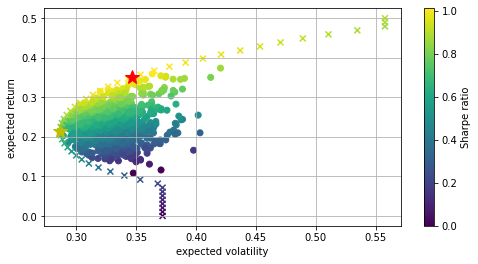

In [124]:
plt.figure(figsize = (8,4))

plt.scatter(port_variance, port_returns, c = port_returns/port_variance,marker = 'o')

plt.scatter(target_variance,target_returns, c = target_returns/target_variance, marker = 'x')

plt.plot(stats(opts['x'])[1], stats(opts['x'])[0], 'r*', markersize = 15.0)

plt.plot(stats(optv['x'])[1], stats(optv['x'])[0], 'y*', markersize = 15.0)
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe ratio')